# 1 Decision Tree Algorithm

 1.3 Building Decision Trees

 i. Importing libraries

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

 ii. Dataset loading and exploratory data analysis Loading Dataset

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head() # Preview the dataset
diabetes_df.shape # Number of instances and variables

(768, 9)

 Renaming columns

In [ ]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
diabetes_df.columns = col_names # Rename column names

 Summary of dataset

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Frequency distributions of values in variables

In [ ]:
for col in col_names:
    print(diabetes_df[col].value_counts())

pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
bp
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
skin
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40  

 Exploring target variable

In [ ]:
diabetes_df['label'].value_counts()

,count
label,
0,500
1,268


 Checking missing values in variables

In [ ]:
diabetes_df.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


iii. Defining feature vector and target variable

In [ ]:
X = diabetes_df.drop(['label'], axis=1)
y = diabetes_df['label']

 iv. Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

((576, 8), (192, 8))

 v. Feature engineering: encoding categorical variables

In [ ]:
X_train.dtypes # Check data types in X_train

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=X.columns.tolist())
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00


 vi. Building decision tree classifier with the Gini index criterion

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

 vii. Predicting results for the test set

In [ ]:
y_pred = clf_gini.predict(X_test)

 viii. Evaluating model

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


ix. Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

[[104  19]
 [ 21  48]]


1.5 Visualizing Decision Trees

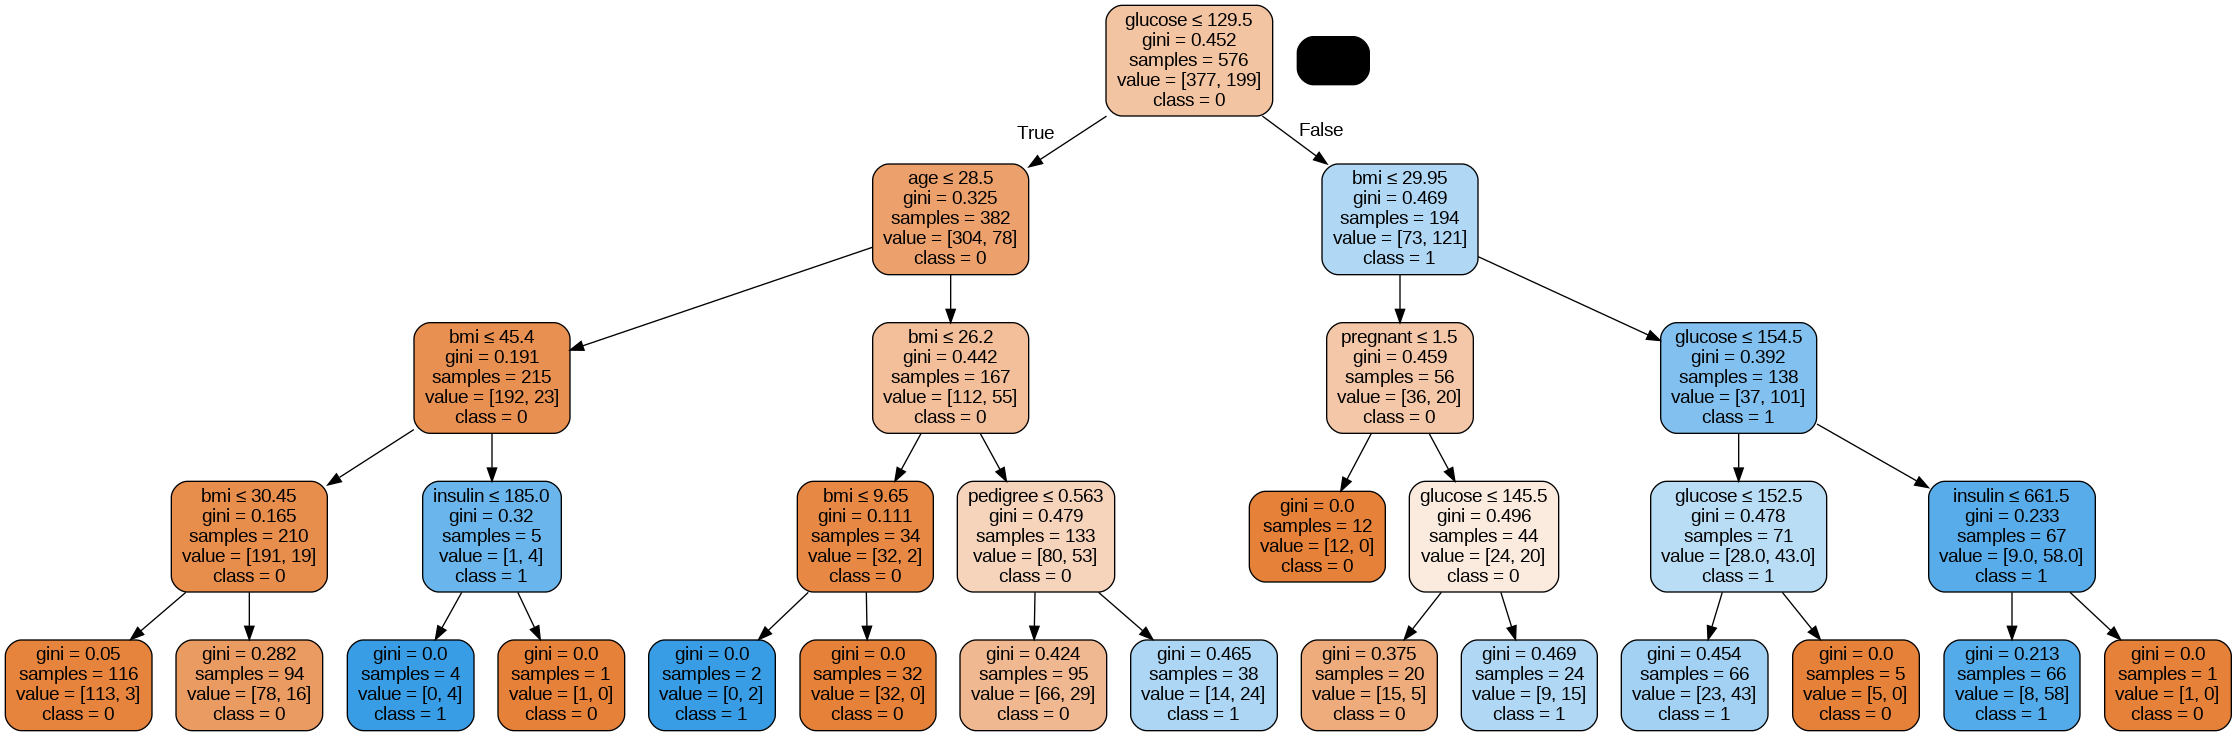

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X.columns,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

1.6 Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.72      0.70      0.71        69

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192



 2 k-Nearest Neighbors (kNN)

 2.4 Implementation in Python

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Hyperparameter tuning for k and distance metric
param_grid = {
 'n_neighbors': [3,5,7,9],
 'metric':['euclidean','manhattan']
}

grid = GridSearchCV(
  KNeighborsClassifier(),
  param_grid,
  cv=5,
  scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print('Best params:', grid.best_params_)
print('kNN accuracy:', metrics.accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Best params: {'metric': 'manhattan', 'n_neighbors': 7}
kNN accuracy: 0.7395833333333334
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       123
           1       0.69      0.51      0.58        69

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



 2.5 Decision Boundary Visualization (2D projection)

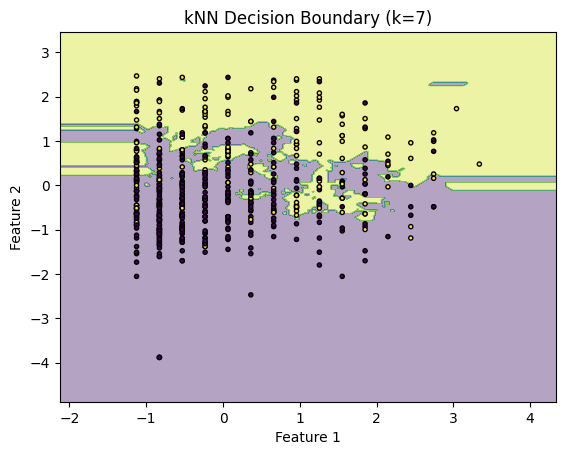

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Use only first two features
X2_train = X_train_scaled[:, :2]
X2_test = X_test_scaled[:, :2]

knn2 = KNeighborsClassifier(
  n_neighbors=grid.best_params_['n_neighbors'],
  metric =grid.best_params_['metric']
)
knn2.fit(X2_train, y_train)

# create meshgrid
h = 0.02
x_min, x_max = X2_train[:,0].min()-1, X2_train[:,0].max()+1
y_min, y_max = X2_train[:,1].min()-1, X2_train[:,1].max()+1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h)
)

# predict on grid
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(
  X2_train[:,0], X2_train[:,1],
  c=y_train, edgecolor='k', marker='.'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(
  f'kNN Decision Boundary (k={grid.best_params_["n_neighbors"]})'
)

plt.show()

#Task 1

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv('wine.csv')

In [15]:
# Defining feature vector and target variable
X = df . drop (['Wine'], axis =1)
y = df ['Wine']

In [16]:
#Checking missing values in variables
df . isnull (). sum ()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [17]:
# Filling missing values with column-wise mean
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
X_filled = mean_imputer.fit_transform(X)

In [18]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

In [22]:
from sklearn import metrics

# Model Evaluation
print("Results for Decision Tree using Gini Index:")
print("Accuracy:", metrics . accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

print("\nResults for Decision Tree using Entropy:")
print("Accuracy:", metrics . accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

Results for Decision Tree using Gini Index:
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Results for Decision Tree using Entropy:
Accuracy: 0.9166666666666666
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 1  2  5]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      1.00      0.93        14
           3       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89

In [26]:
# Apply pruning by limiting the tree depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Limit tree depth to control overfitting
pruned_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)
predictions = pruned_tree.predict(X_test)

print("Decision Tree with Depth Limit (max_depth=3)")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Decision Tree with Depth Limit (max_depth=3)
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



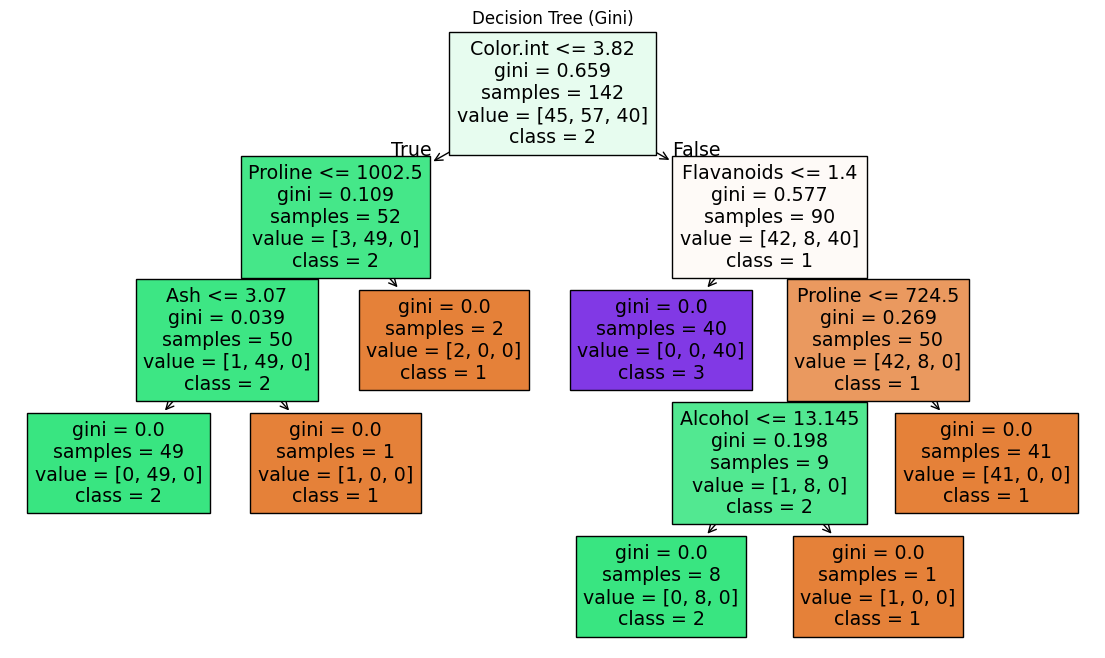

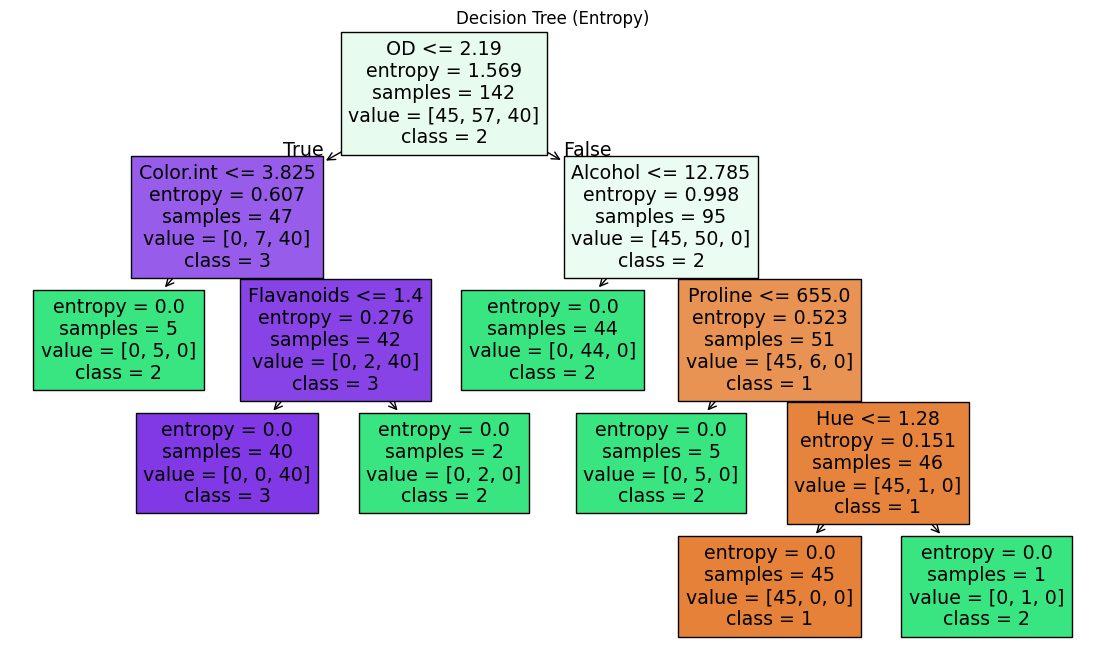

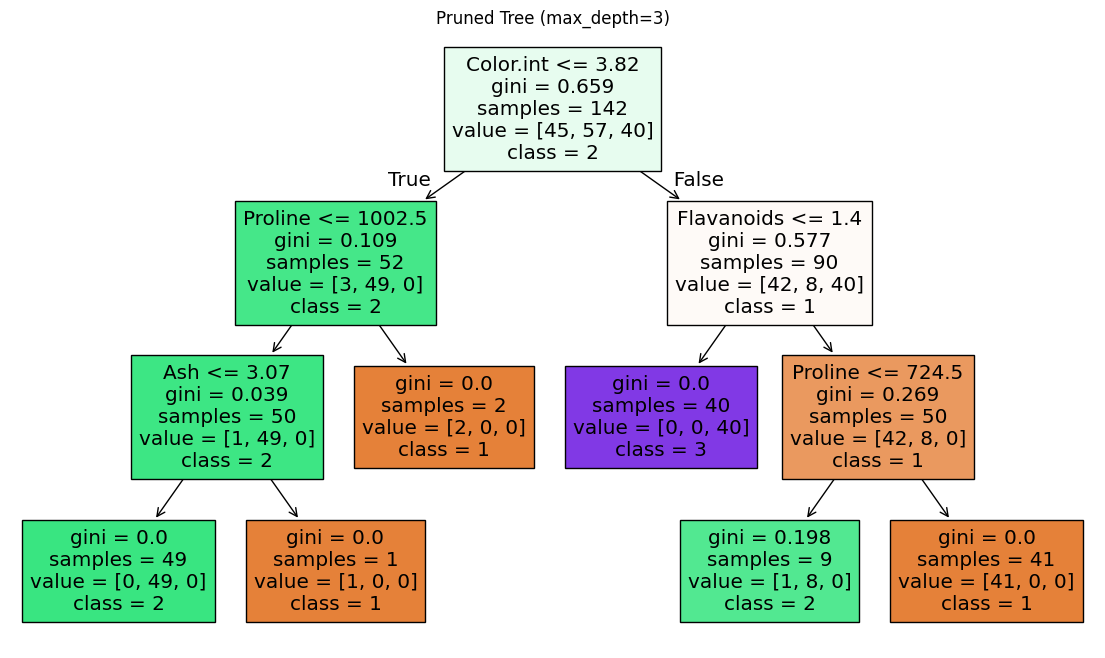

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["1", "2", "3"])
plt.title("Decision Tree (Gini)")
plt.show()

plt.figure(figsize=(14, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["1", "2", "3"])
plt.title("Decision Tree (Entropy)")
plt.show()

plt.figure(figsize=(14, 8))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=["1", "2", "3"])
plt.title("Pruned Tree (max_depth=3)")
plt.show()

#Task 2

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import time

# Normalize features using standard scaling
standardizer = StandardScaler()
X_train_scaled = standardizer.fit_transform(X_train)
X_test_scaled = standardizer.transform(X_test)


In [29]:
# Define hyperparameter options for tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')

# Measure training time
start = time.time()
grid_search.fit(X_train_scaled, y_train)
stop = time.time()

# Retrieve the best performing model
optimal_knn = grid_search.best_estimator_
knn_predictions = optimal_knn.predict(X_test_scaled)


In [30]:
# Model Evaluation Summary
print("Optimal Hyperparameters for kNN:", grid_search.best_params_)
print("Test Set Accuracy:", accuracy_score(y_test, knn_predictions))
print("Execution Time:", round(stop - start, 4), "seconds")
print("\nDetailed Classification Metrics:\n", classification_report(y_test, knn_predictions))


Optimal Hyperparameters for kNN: {'metric': 'manhattan', 'n_neighbors': 5}
Test Set Accuracy: 0.9444444444444444
Execution Time: 0.2347 seconds

Detailed Classification Metrics:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

